<div>
Olá, Carolina!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>
<s>
    
Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto está muito bom e possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Comentários sucintos e bem objetivos
- Conclusões pertinentes em cada análise e etapa de avaliação
- Boas práticas de programação e organização de código
- Uso adequado de gráficos e visualizações
    
<br> 
    
Entretanto, um comentário em um pequeno ajuste que precisamos fazer no filtro de período dos dados. Peço que trabalhe nesse ponto para avançarmos.
 
<br>
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**
</s>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

***
# <span style="color:green">Sprint 6 - Projeto Integrado</span> <span style="color:blue">*Online Game Store Ice*</span>


***

## Lendo o arquivo de dados e importando as bibliotecas

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [151]:
df = pd.read_csv('/datasets/games.csv')

---

## Verificando o DataFrame e tratando os dados

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [153]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados foram carregados corretamente em célula separada
- O método `head()` foi utilizado para exibir uma amostra dos dados
- O método `info()` foi utilizado para estudo inicial dos dados
</div>

### Transformando todos os nomes de colunas de maiúsculo para minúsculo.

In [154]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Verificando os valores nulos da coluna year_of_release e substituindo-os

In [155]:
df['year_of_release'].isna().sum()

269

In [156]:
df['year_of_release'] = df['year_of_release'].fillna(0)

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
    
Aqui não podemos preencher os atributos de ano de lançamento e score com um valor fictício ou média, pois isso irá distorcer a distribuição dos dados (note que `0.0` é um valor possível de nota e você está assumindo que **todos** os valores ausentes possuem essa nota). Minha sugestão é deixar como `nan`.
</s>
</div>

<div class="alert alert-block alert-info">
<b>Concordo com relação as notas mas sobre o ano de lançamento se não temos esses dados não tem sentido usar-los certo? Se caso vamos ver os lançamentos num gráfico, teremos uma barra com valores nulos e neste caso não vão servir de nada. O correto neste caso para uma analise seria deixa-los como nan e na hora de plotar o gráfico fazemos um filtro para esses valores não aparecerem? Se sim, qual a diferença em deixa-los nan, ter que fazer um filtro para remover ao inves de já subistituir por 0.0?</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

    
Boa pergunta! 
    
O correto aqui é remover esses casos caso não tenha outra forma de recuperar os valores perdidos. Sobre a diferença, nenhuma, apenas é desnecessário preencher valores para um atributo e depois filtrá-los.
</div>

#### Transformando a coluna year_of_release para o tipo inteiros

In [157]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

### Somando o total de vendas e adicionando esta coluna ao DataFrame

In [158]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
A receita total foi calculada e um novo atributo foi criado (`total_sales`)
</div>

### Verificando a coluna user_score e contando quantos valores TBD (to be determined) existem

In [159]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
0.3       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

#### Substituindo os valores TBD (to be determined) por 0 e convertendo a coluna de object para float

In [160]:
df['user_score'] = df['user_score'].replace('tbd',  np.nan)
df['user_score'] = df['user_score'].astype('float')
df['user_score'].value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
0.9      2
1.9      2
1.3      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

<div class="alert alert-block alert-info">
<b>Fiz a alteração conforme solicitado.</b> <a class="tocSkip"></a>
</div>

### E o que foi feito?

- Decidi substituir os valores nulos das colunas de year_of_release por 0 e transformei o tipo da coluna para inteiros para ser mais fácil processar os dados.
- Verifiquei que a coluna user_score tinham muitos valores TBD que talvez ainda vão ser adicionados ou não e transformei para float pois eram valores fracionados.
- Não irei alterar as demais colunas por enquanto e nem substituir os valores nulos pois varemos o que o projeto solicita.

---

## Análise de Dados

### Filtrando os jogos por ano de lançamento e contando a quantidade de lançamentos por ano

In [161]:
by_year = df[df['year_of_release'] != 0]
by_year_count = by_year.groupby('year_of_release')['year_of_release'].count()
by_year_count = by_year_count.reset_index(name='count')
by_year_count.head()

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


### Quantos jogos foram lançados em anos diferentes? Os dados de cada período são significativos?

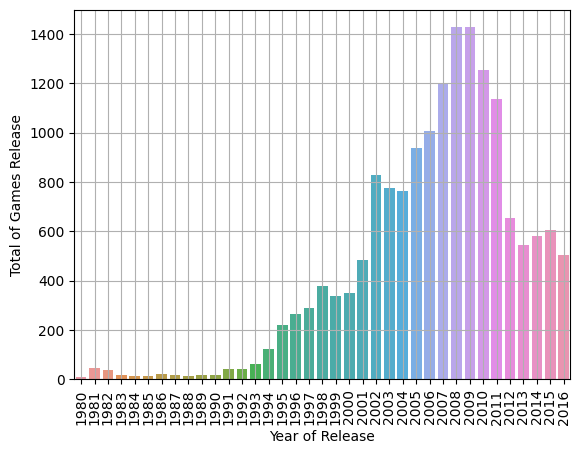

In [162]:
sns.barplot(data=by_year_count, x='year_of_release', y='count', ci=None)
plt.xticks(rotation= 90)
plt.grid(linestyle='-')
plt.xlabel('Year of Release')
plt.ylabel('Total of Games Release');

### Conclusão
Como podemos observar no gráfico acima, o lançamento de jogos começou aos poucos mas foi aumentando exponecialmente conforme o passar dos anos. Entre 2001 e 2002 os lançamentos dobraram e a partir de 2005 foram mais de 800 novos jogos por ano, atingindo o pico em 2008 e 2009 com pouco mais de 1400 jogos lançados. Após este período, podemos observar uma queda.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A distribuição de lançamentos ao longo dos anos foi analisada
- Um gráfico de barras foi utilizado corretamente
</div>

---

## Verificando as plataformas com mais vendas 

### Agrupando as vendas por plataforma e ano de lançamento e somando o total de vendas

In [163]:
top_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].sum()
top_sales = top_sales.reset_index(name='sales_count')
top_sales = top_sales.sort_values('sales_count', ascending=False)
top_sales = top_sales[top_sales['year_of_release'] != 0]
top_sales.head(10)

,platform,year_of_release,sales_count
144,PS2,2004,211.81
214,Wii,2009,206.97
142,PS2,2002,205.38
143,PS2,2003,184.31
213,Wii,2008,171.32
233,X360,2010,170.03
133,PS,1998,169.49
141,PS2,2001,166.43
145,PS2,2005,160.66
158,PS3,2011,156.78


### Criando um gráfico de barras para melhor visualizar o volume de vendas por plataforma

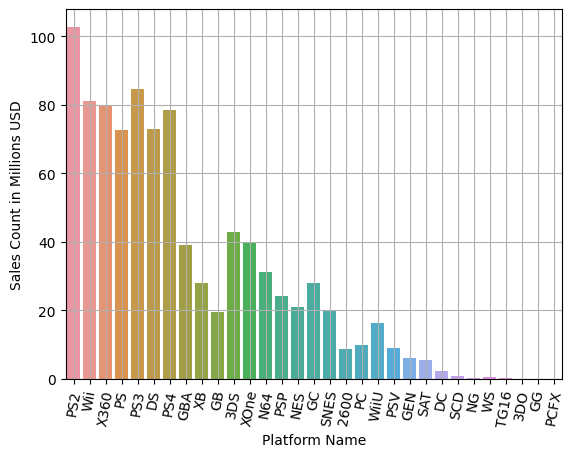

In [164]:
sns.barplot(data=top_sales, x='platform', y='sales_count', ci=None)
plt.xticks(rotation= 80)
plt.grid(linestyle='-')
plt.ylabel('Sales Count in Millions USD')
plt.xlabel('Platform Name');

- Podemos verificar que neste período em que temos os dados, a plataforma lider de vendas foi o PS2.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>
    
O cálculo de ciclo de vida das plataformas acima não está correto. Sugestão:
   
- 1. Qual o ciclo de vida médio das plataformas? Para isso, você precisa calcular o intervalo entre primeiro e último lançamentos por plataforma e calcular a diferença em anos. Você pode calcular a média e também plotar a distribuição desse atributo
- 2. Quanto tempo leva para uma plataforma atingir o seu pico? Você pode responder à essa pergunta fazendo cálculo parecido. Por exemplo, desde o primeiro lançamento, quanto tempo, em média, leva para uma plataforma atinger o máximo de vendas? 
    
Obs.: Lembre-se de fazer esse estudo **antes** de filtrar os dados pelo ano de lançamento, caso contrário, as métricas ficaram distorcidas.
    
    
Aqui você pode seguir a seguinte rotina:
    
1. Para cada plataforma, selecione a data do primeiro e do último lançamento usando métodos como `groupby(..)` e `min()` e `max()`
2. A partir das datas mínima e máxima, calcule o intervalo em anos entre os lançamentos (max-min)
3. Analise a distribuição: min, média, max 
4. Opcionalmente, plote a distribuição usando histogramas ou boxplots
</s>

</div>

In [165]:
fill = df[df['year_of_release'] != 0]
first_release = fill.groupby('platform')['year_of_release'].min()
last_release = df.groupby('platform')['year_of_release'].max()
mean = last_release - first_release
mean

platform
2600     9
3DO      1
3DS      5
DC      10
DS      28
GB      13
GBA      7
GC       6
GEN      4
GG       0
N64      6
NES     11
NG       3
PC      31
PCFX     0
PS       9
PS2     11
PS3     10
PS4      3
PSP     11
PSV      5
SAT      5
SCD      1
SNES     9
TG16     0
WS       2
Wii     10
WiiU     4
X360    11
XB       8
XOne     3
Name: year_of_release, dtype: int64

### Filtrando as 5 plataformas líderes de vendas e contando o número de lançamentos anuais por plataforma
- Após vizualizar o gráfico acima, verificamos que as 5 principais plataformas que foram líderes em vendas foram PS2, Wii, X360, PS e PS3.

In [166]:
sales_year = df[df['platform'].isin(['PS2', 'Wii', 'X360', 'PS', 'PS3'])]
sales_year = sales_year[sales_year['year_of_release'] >= 1980]
sales_year = sales_year.groupby(['platform', 'year_of_release'])['year_of_release'].count().reset_index(name='count')
sales_year.head()

,platform,year_of_release,count
0,PS,1994,17
1,PS,1995,99
2,PS,1996,164
3,PS,1997,188
4,PS,1998,248


#### Criando um gráfico para melhor visualização

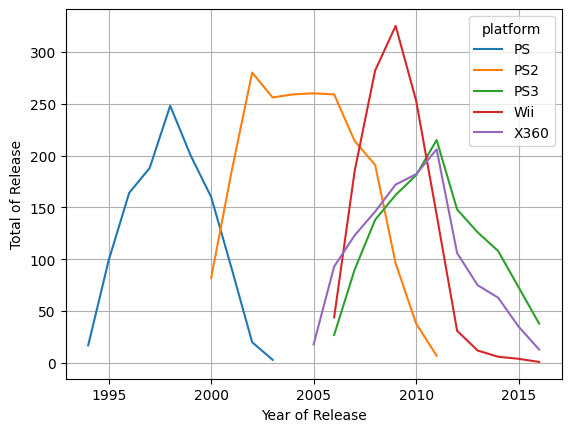

In [167]:
sns.lineplot(data=sales_year, x='year_of_release', y='count', hue='platform')
plt.ylabel('Total of Release')
plt.xlabel('Year of Release');
plt.grid(linestyle='-');

#### Conclusão
Observando o gráfico acima podemos verificar que uma nova plataforma dura em média 10 anos. No caso das plataformas do PS (Play Station) a queda começa pouco antes do novo modelo ser lançado.

---

## Entre o período de 2012 e 2017, quais as plataformas lideraram as vendas e quais plataformas serão potencialmente lucrativas após este período?

- Filtrando as 5 principais plataformas deste período

In [168]:
five_platforms = df[df['year_of_release'] >= 2012].groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False)
five_platforms = five_platforms['platform'].head(10).unique()
five_platforms

array(['PS4', 'PS3', 'X360', 'XOne', '3DS'], dtype=object)

- Criando o gráfico

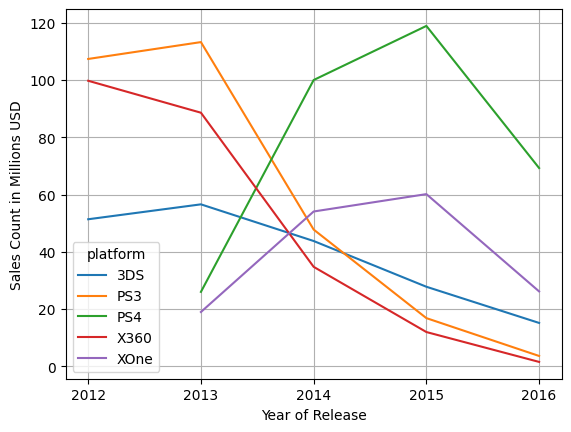

In [173]:
new_sales = df[(df['year_of_release'] >= 2012) & (df['platform'].isin(five_platforms))].groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
sns.lineplot(x='year_of_release', y='total_sales', data=new_sales, hue='platform')

plt.grid(linestyle='-')
plt.xticks(range(2012, 2017))
plt.ylabel('Sales Count in Millions USD')
plt.xlabel('Year of Release');

<div class="alert alert-block alert-info">
<b>Alterei este gráfico também dentro do período.</b> <a class="tocSkip"></a>
</div>

### Conclusão
Podemos apostar nos próximos modelos do Play Station e do XBox para os próximos anos pois podemos observar que as duas plataformas tiveram mais vendas por maiores períodos.

---

## Construa um diagrama de caixa para verificar se a venda média por plataforma são significativas

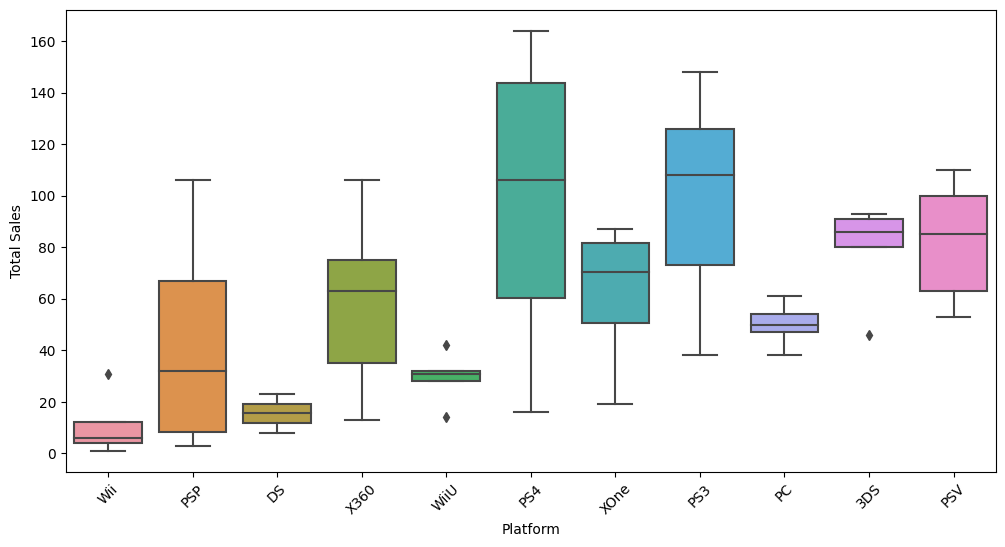

In [147]:
box_plot = df[df['year_of_release'] >= 2012].groupby(['platform', 'year_of_release'])['total_sales'].count().reset_index()
box_plot = box_plot.sort_values(by = 'total_sales', ascending = True)

plt.figure(figsize = (12,6))
sns.boxplot(x = 'platform', y = 'total_sales', data = box_plot)
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### Conclusão
Observamos que as principais plataformas são Wii, PSP, X360, PS3 e PC onde tem a maior média de vendas deste período.

<div class="alert alert-block alert-info">
<b>Editado - O líder de vendas entre 2012 e 2017 é o PS4 com a maior média de vendas do período.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>
    
Você precisa filtrar o dataframe pelo período relevante, através da coluna `year_of_release`. Dicas:
    
- Plote a distribuição dos dados para fazer esse filtro. Veja no gráfico histórico o período de maior concentração de dados
- Além disso, o período selecionado deve ser no máximo até 5 anos e até 2017 (ou seja, <=2017)
- O período selecionado não pode ser menor do que 3 anos
- Sugestão: filtro os dados a partir de `2012`.
</s>                                                                            
</div>

---

## Verificando a relação entre a avaliação dos usuários e os profissionais no total das vendas na plataforma PS3. 

- Criando o gráfico de disperção entre a avaliação dos usuários e a venda global dos jogos.

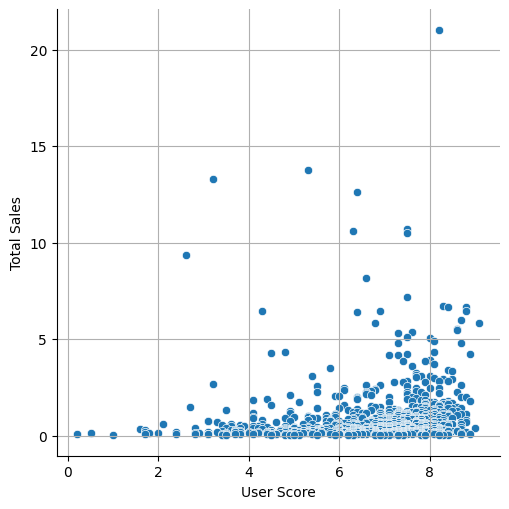

In [33]:
correlation = df[(df['platform'] == 'PS3') & (df['user_score'] > 0)]

sns.relplot(data=correlation, x="user_score", y="total_sales")
plt.grid(linestyle='-')
plt.ylabel('Total Sales')
plt.xlabel('User Score');

- Criando o gráfico de disperção entre a avaliação da ESRB e a venda global dos jogos.

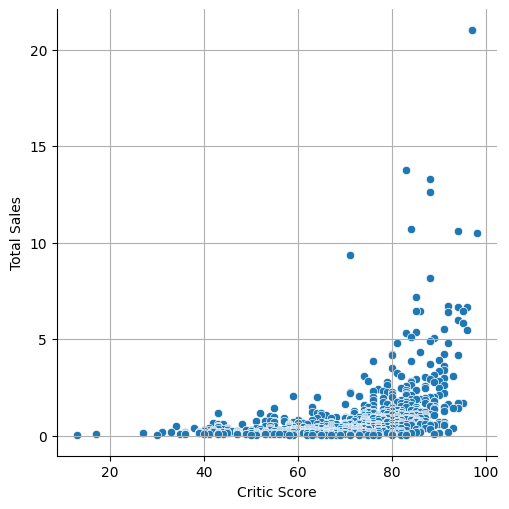

In [34]:
sns.relplot(data=correlation, x="critic_score", y="total_sales")
plt.grid(linestyle='-')
plt.ylabel('Total Sales')
plt.xlabel('Critic Score');

### Conclusão
Claramente a classificação da ESRB influencia na venda dos jogos.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A correlação entre scores e vendas totais foi analisada.
                                                                                 
</div>

---

## Criando um gráfico para vizualizar a relação entre os generos e as vendas globais

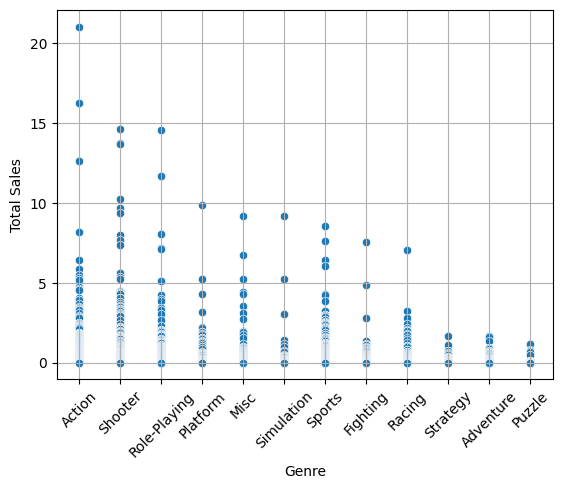

In [174]:
sales_by_genre = df[df['year_of_release'] >= 2012]

sns.scatterplot(data=sales_by_genre, x="genre", y="total_sales")
plt.grid(linestyle='-')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.xlabel('Genre');

### Conclusão
Percebemos que o genero Sports tem uma alta de vendas devido ao sucesso que foi o Wii.

<div class="alert alert-block alert-info">
<b>Editado - Dentro deste período de 2012 até 2017 observamos que o genero Action, seguido de Shooter e RPG são os principais genero considerando as vendas globais.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>Veja o comentário que deixei acima acerca do período de filtro dos dados.</s>
                                                                                 
</div>

---

## Criando um perfil de usuário para cada região

### Perfil do usuário da região Norte América
- Filtrando as vendas por genero na América do Norte e selecionando os 5 primeiros generos preferidos da região.

In [36]:
generos_na = df[df['year_of_release'] >= 1980].groupby('genre')['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False)
generos_na = generos_na['genre'].head().unique()
generos_na

array(['Action', 'Sports', 'Shooter', 'Platform', 'Misc'], dtype=object)

- Agrupando os 5 primeiros generos favoritos da região e criando o gráfico

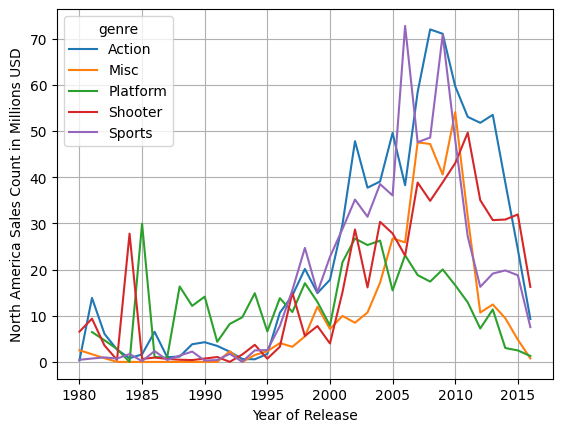

In [37]:
region_na = df[(df['year_of_release'] >= 1980) & (df['genre'].isin(generos_na))].groupby(['genre', 'year_of_release'])['na_sales'].sum().reset_index()

sns.lineplot(x='year_of_release', y='na_sales', data=region_na, hue='genre')

plt.grid(linestyle='-')
plt.ylabel('North America Sales Count in Millions USD')
plt.xlabel('Year of Release');

#### Resultado
Podemos observar que na América do Norte, entre os anos 80 e começo dos anos 90 os usuários preferiam o generos Shooter e Platform mas conforme o tempo foi passando e novos jogos foram inventados, a partir dos anos 2000 os generos preferidos eram Sports e Action, porem estes generos também tiveram uma queda até 2016.

### Perfil do usuário da região Europa
- Filtrando as vendas por genero na Europa e selecionando os 5 primeiros generos preferidos da região.

In [38]:
generos_eu = df[df['year_of_release'] >= 1980].groupby('genre')['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False)
generos_eu = generos_eu['genre'].head().unique()
generos_eu

array(['Action', 'Sports', 'Shooter', 'Racing', 'Misc'], dtype=object)

- Agrupando os 5 primeiros generos favoritos da região e criando o gráfico

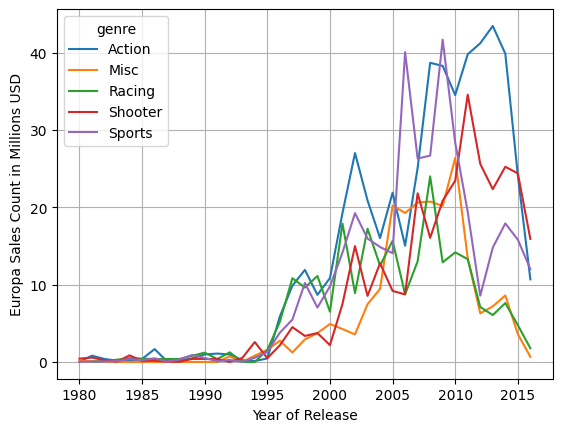

In [39]:
region_eu = df[(df['year_of_release'] >= 1980) & (df['genre'].isin(generos_eu))].groupby(['genre', 'year_of_release'])['eu_sales'].sum().reset_index()

sns.lineplot(x='year_of_release', y='eu_sales', data=region_eu, hue='genre')

plt.grid(linestyle='-')
plt.ylabel('Europa Sales Count in Millions USD')
plt.xlabel('Year of Release');

#### Resultado
Já na Europa parece que as pessoas não se importavam muito com jogos logo no seu nascimento e só começaram a ter interesse após o ano de 1995. 
Entre o ano de 2005 e 2015 os generos de maior sucesso foram Sports e Action e perto temos Shooter também.

### Perfil do usuário da região Japão
- Filtrando as vendas por genero no Japão e selecionando os 5 primeiros generos preferidos da região.

In [40]:
generos_jp = df[df['year_of_release'] >= 1980].groupby('genre')['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False)
generos_jp = generos_jp['genre'].head().unique()
generos_jp

array(['Role-Playing', 'Action', 'Sports', 'Platform', 'Misc'],
      dtype=object)

- Agrupando os 5 primeiros generos favoritos da região e criando o gráfico

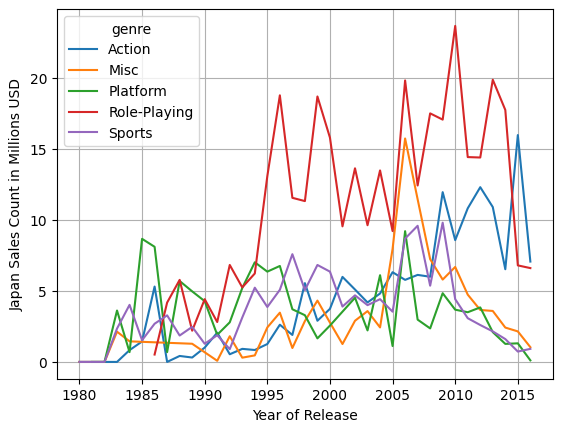

In [41]:
region_jp = df[(df['year_of_release'] >= 1980) & (df['genre'].isin(generos_jp))].groupby(['genre', 'year_of_release'])['jp_sales'].sum().reset_index()

sns.lineplot(x='year_of_release', y='jp_sales', data=region_jp, hue='genre')

plt.grid(linestyle='-')
plt.ylabel('Japan Sales Count in Millions USD')
plt.xlabel('Year of Release');

#### Resultado
No Japão a história é completamente diferente. Percebemos que em 1985 os usuários gostavam bastante de jogos de Platform mas os gostos eram mais equilibrados com os outros generos. Percebemos que em 1995 o genero Role-Playing, ou RPG se tornou muito popular e seguiu lider de vendas desde 1995 com altos e baixos e só em 2015 teve uma queda considerável perdendo sua posição para os jogos de Action. Percebemos também um interesse após 2005 em jogos Misc mas em torno de 2007 este genero volta a ter uma queda.

---

### Verificando a classificação ESRB para cada região

Para ficar mais claro resolvi criar uma legenda para a classificação da ESRB ("Entertainment Software Rating Board" algo como "Organização da Classificação de Software")

- E = Everyone (Livre)
- M = Maduro 17+ (A partir de 17 anos) 
- Teen = Adolecentes (a partir de 13 anos)
- E10+ = Livre (a partir de 10 anos)
- K-A = Crianças e Adultor (a partir d 6 anos em diante)
- A-O = Apenas Adultos (a partir de 18 anos)
- E-C = Crianças pequenas (até 3 anos)
- R-P = Classificação ainda pendente

#### Classificação ESRB na região da América do Norte

- Decidi substituir os valores ausentes na coluna rating por 'unknow' e depois filtrar os resultados sem esses valores.

In [42]:
df['rating'] = df['rating'].fillna('unknown')
esrb = df[df['rating'] != 'unknown']

In [43]:
esrb = esrb[esrb['year_of_release'] >= 1980]
esrb_na = esrb.groupby(['rating', 'year_of_release'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False)
esrb_na.head()

,rating,year_of_release,na_sales
13,E,2008,133.77
11,E,2006,132.99
14,E,2009,132.01
12,E,2007,127.06
15,E,2010,100.98


#### Visualizando os dados

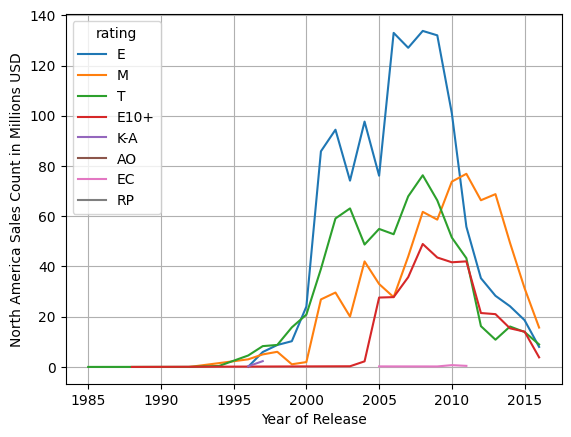

In [44]:
sns.lineplot(x='year_of_release', y='na_sales', hue='rating', data=esrb_na)
plt.grid(linestyle='-')
plt.ylabel('North America Sales Count in Millions USD')
plt.xlabel('Year of Release');

##### Resultado
- Na América do Norte os jogos mais vendidos são de conteúdo livre.

#### Classificação ESRB na região da Europa

In [45]:
esrb_eu = esrb.groupby(['rating', 'year_of_release'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False)
esrb_eu.head()

,rating,year_of_release,eu_sales
11,E,2006,68.01
12,E,2007,66.47
13,E,2008,65.11
14,E,2009,64.16
59,M,2011,56.30


#### Visualizando os dados

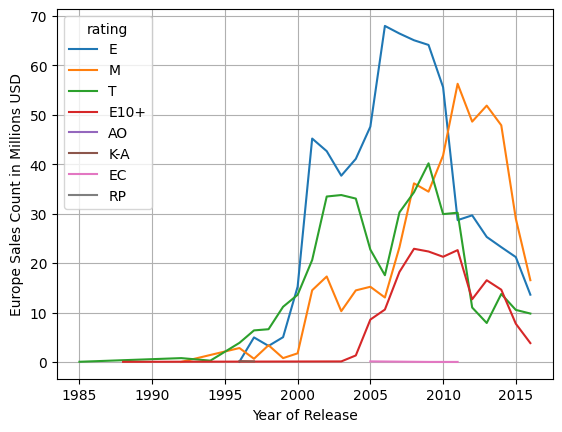

In [46]:
sns.lineplot(x='year_of_release', y='eu_sales', hue='rating', data=esrb_eu)
plt.grid(linestyle='-')
plt.ylabel('Europe Sales Count in Millions USD')
plt.xlabel('Year of Release');

##### Resultado
- Na Europa os jogos mais vendidos também são de conteúdo livre, porém a partir de 2010 tiveram uma queda e os jogos de conteúdo maduro tiveram uma alta mas durando apenas 5 anos voltando a ter uma queda.

#### Classificação ESRB na região do Japão

In [47]:
esrb_jp = esrb.groupby(['rating', 'year_of_release'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False)
esrb_jp.head()

,rating,year_of_release,jp_sales
10,E,2005,26.97
11,E,2006,25.30
12,E,2007,17.89
13,E,2008,15.68
81,T,2008,13.92


#### Visualizando os dados

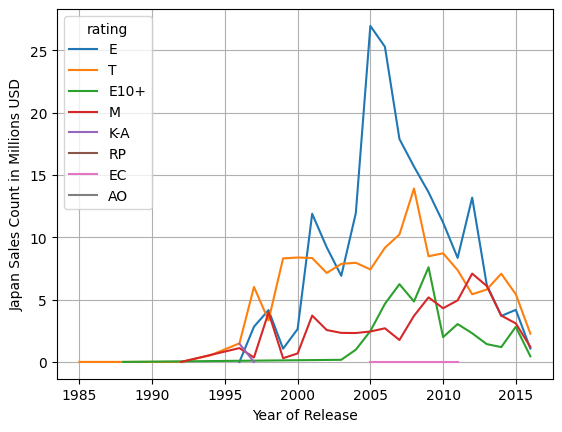

In [48]:
sns.lineplot(x='year_of_release', y='jp_sales', hue='rating', data=esrb_jp)
plt.grid(linestyle='-')
plt.ylabel('Japan Sales Count in Millions USD')
plt.xlabel('Year of Release');

##### Resultado
- No Japão os jogos mais vendidos estavam equilibrados entre 1997 até o começo dos anos 2000 entre o genero Adolecente e Livre mas em 2003 tivemos uma alta nos jogos com classificação Livre com pico em 2005 e depois com uma queda até depois de 2010.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O perfil de usuário foi criado por região. Sugestão: aqui você poderia calcular outras estatísticas descritivas como **desvio padrão** de vendas por região
- As conclusões foram apresentadas. Bom trabalho com a criação dos gráficos na análise acima!
</div>

---

## Testando hipóteses

### Testando a hipótese que a classificação média das plataformas Xbox One e Pc são as mesmas ou não.
- Hipótese nula - As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas. 
- Hipótese alternativa - As classificações médias dos usuários das plataformas Xbox One e PC são diferentes.

In [49]:
xone = df[df['platform'] == 'XOne']['user_score'].dropna()
pc = df[df['platform'] == 'PC']['user_score'].dropna()

alpha= 0.05

results = stats.ttest_ind(xone, pc, equal_var=False)

print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')
else:
    print('Não podemos rejeitar a hipótese nula')

valor-p:  4.935072360183574e-06
Rejeitamos a hipótese nula


### Testando a hipótese que a classificação média para os generos Ação e Esporte são as mesmas ou não.
- Hipótese nula - As classificações médias dos usuários para os generos Ação e Esporte são as mesmas. 
- Hipótese alternativa - As classificações médias dos usuários para os generos Ação e Esporte são diferentes.

In [50]:
action = df[df['genre'] == 'Action']['user_score'].dropna()
sport = df[df['genre'] == 'Sports']['user_score'].dropna()

alpha= 0.05

results = stats.ttest_ind(action, sport, equal_var=False)

print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')
else:
    print('Não podemos rejeitar a hipótese nula')

valor-p:  0.11483818791498286
Não podemos rejeitar a hipótese nula


#### Resultado
- Resolvi usar o Student's t-test pois é o teste que compara a média de duas variaveis onde a hipótese nula significa que as amostras são iguais e a hipótese alternativa é que as amostras são diferentes.
- Então com o teste pudemos observar que tanto a comparação das plataformas como os generos as avaliações são diferentes.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- As hipóteses nula e alternativa foram definidas
- O argumento `equal_var` foi definido corretamente
- O `p-valor` foi calculado e exibido
- O teste foi executado corretamente e o resultado foi interpretado
  
</div>

# Conclusão final

Após avaliar os dados sobre a loja de Games Online Ice, pudemos descobrir algumas coisas como o sucesso que a Nintendo teve com o lançamento do Wii com o jogo Wii Sports. Observamos também que a Sony com o Play Station é uma empresa forte neste ramo e foi sempre inovando e conseguiu acertar em muitos aspectos. Pudemos analisar o perfil dos usuários por região e notamos que como no Japão, eles dão preferência para as plataformas que foram inventadas no seu próprio país. Na Europa por outro lado as pessoas não tiveram muito interesse no inicio desse novo mundo de video games e suas vendas demoraram um tempo para crescer. O que não podemos negar é que este modelo de negócio, quando agrada ao público, seja por um novo tipo de controle ou gráficos mais avançados é um mercado muito lucrativo. Desde o nascimento dos video games as pudemos notar o crescimento nas vendas que seguem bem até hoje. Não podemos deixar de reconhecer as plataformas antigas e graças a elas temos consoles e jogos muito bom.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Bom trabalho com a conclusão final. Muito bem estruturado, resumindo os principais resultados do estudo.
</div>